Задача 1

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите среднее квадратическое отклонение массы коробки. Найдите долю коробок, имеющих массу больше 1.1 кг.

Подсказка. 1) Можно считать, что распределение массы коробки нормальное. 2) Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Необходимая точность: 10 ** (-4).



$\mu = loc$
$\sigma = scale$

In [2]:
import numpy as np
from scipy import stats

In [6]:
x1 = 0
x2 = 1
target = 0.05
err = 10 ** (-4)
while True:
    scale = (x1 + x2)/2
    cdf = stats.norm.cdf(1, loc=1.06, scale=scale)
    
    if cdf <= target - err:
        x1 = scale
    elif cdf >= target + err:
        x2 = scale
    else:
        break
print(scale)

0.036468505859375


In [7]:
1 - stats.norm.cdf(1.1,loc=1.06, scale=scale)

0.1363563656878326

Задача 2

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найдите вероятность того, что масса всей коробки будет: а) меньше 390 граммов; б) больше 395 граммов; в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

Подсказка. Для равномерного распределения в промежутке [a, b]:
1. мат. ожидание равно (a + b) / 2,
2. дисперсия равна (b - a)^2 / 12.



M - математическое ожидание = (12+14)/2 = 13
D - дисперсия = (14-12)**2 / 12 = 0,333

Пусть имеется $n$ случайных величин $X_1, \dots, X_n$, имеющих одинаковое распределение с математическим ожиданием $M$ и дисперсией $D$. Пусть $Y = X_1 + \dots + X_n$ — случайная величина, равная сумме этих значений. 

__Центральная предельная теорема__ утверждает: чем больше $n$, тем _ближе_ распределение величины $Y$ к нормальному распределению с параметрами
$$\mu = n \cdot M, \:\: \sigma^2 = n \cdot D$$

$$\mu = 30 \cdot 13 = 390, \:\: \sigma^2 = 30 \cdot 4/12 = 10$$

вероятность того, что масса всей коробки будет: а) меньше 390 граммов

In [9]:
stats.norm.cdf(390,loc=390, scale=3.16227766017)

0.5

In [ ]:
вероятность того, что масса всей коробки будет: б) больше 395 граммов

In [10]:
1 - stats.norm.cdf(395,loc=390, scale=3.16227766017)

0.05692314900342166

In [ ]:
вероятность того, что масса всей коробки будет: в) от 380 до 400 граммов

In [11]:
stats.norm.cdf(400,loc=390, scale=3.16227766017) - stats.norm.cdf(380,loc=390, scale=3.16227766017)

0.9984345977419888

Задача 3

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). 
Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50, но можно и больше).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения,  D - его дисперсия).

При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

In [21]:
from matplotlib import pyplot as plt

Выберем распределение хи квадрат
М - математическое ожидание = f
D - дисперсия = 2F


In [15]:
f = 3
mean = f
std = 2*f

In [28]:
n = 1000
n_samples = 1000

In [29]:
samples = np.random.chisquare(df=3, size=(n,n_samples))
samples = samples.mean(axis=0)
samples.shape

(1000,)

In [30]:
mu = mean
sigma = std/np.sqrt(n)

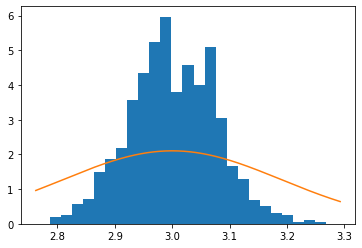

In [31]:
plt.hist(samples,density = True, bins=25)
x0,x1 = plt.xlim()


x = np.linspace(x0,x1,500)
y=stats.norm.pdf(x,loc=mean,scale=sigma)
plt.plot(x,y)